<a id='top'></a>

# CSCI3022 S23


# Homework 8: The Central Limit Theorem & Intro to Statistical Inference
## Due Monday, April 3rd at 11:59pm to Gradescope
***

**Name**: ____________Owen Kutzscher____________________________________________________________

***

***
### Collaboration Policy

While completing the assignment you are not allowed to consult any source other than the course textbooks/online reference links provided on Canvas, your own class notes, and/or the posted lecture slides/in-class Jupyter notebooks.   You may discuss questions you have with your classmates or on Piazza or in office hours, but all work you submit must be your own, which means when writing up your solutions or code, you MUST do it entirely by yourself. 

You should be able to easily reproduce from scratch and explain a solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam without referencing your notes/book/HW.   


**Do not search/ask for a solution online**: You may not actively search for a solution to the problems below from the internet. This includes posting to or using sources like ChatGPT, StackOverflow, StackExchange, Reddit, Chegg, CourseHero, etc.  

**We are here to help!  Visit HW Hours and/or post questions on Piazza!**


Copying/consulting from the solution of another classmate or an online solution (or providing a classmate your solution) constitutes a **violation of the course's collaboration policy and the honor code and will result in an F in the course and a trip to the honor council**.   






### Instructions for Submitting in Correct Format 

You must submit a PDF of this Juptyer notebook to Gradescope by the deadline listed above.  Submissions that are not a PDF or that are not submitted to Gradescope will not be counted for credit.  

$\color{red}{\text{Before submitting your PDF, make sure that your LaTeX has rendered correctly in your PDF.}}$
$\color{red}{\text{Any of your solutions with incorrectly rendered or incompletely rendered LaTeX will be given 0 points.}}$ 

- There are several ways to quickly make a .pdf out of this notebook for Gradescope submission.  
 
 - If you are running Juptyer locally on your computer: 
 
     - Option1 : Select Kernel->Restart & Run All.  Then select File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"
 
     - Option 2: Select Kernel->Restart & Run All.   Then select File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 
 - If you are running using CSEL: 
 
     - Option1 :  Go to File ->Save & Export Notebook As-> HTML.  Then open the HTML, and then Right-Click -> Print and select "Print to PDF".  
     - Option2 :  Go to File ->Download. Then use this converter https://htmtopdf.herokuapp.com/ipynbviewer/ to convert ipynb to pdf.
 
### Notes
- For full points you must correctly match your questions to the respective Gradescope problem, and include clear comments in your code.   Please note that any LaTeX that is not correctly rendered in your submitted PDF will result in a 0 on the entire problem(s) that involves the unrendered LaTeX. 
- You **must show all work and justify ALL answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Any relevant data sets are available on Canvas. 
- LaTeX Tips:  Here is a [reference guide] (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).  **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 

- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.




We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### [10 points] Problem 1 
*** 

The file income_data.csv contains Age and Income information from a fictitious city in the Midwest with 5000 residents.  

**Part A**: Load the data into a pandas DataFrame called `dfIncome` and make a histogram of the Income data with 20 bins. 

array([[<AxesSubplot: title={'center': 'Income'}>]], dtype=object)

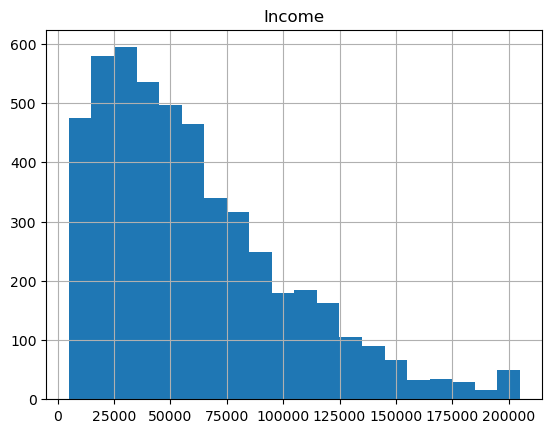

In [2]:
dfIncome = pd.read_csv('income_data.csv')

dfIncome.hist(column='Income',bins=20)

**Part B**: Describe the shape of the Income distribution (i.e. symmetric, positively skewed, negatively skewed)

**Solution**: 

this data is positively skewed

**Part C**: Determine the mean income for the entire population. 

In [3]:
#Your code here


#income mean is 60613

dfIncome.mean(skipna=True)

Age          37.2504
Income    60613.8492
dtype: float64

**Part D**: In real life, we have populations much bigger than $5000$.  If we want to estimate the mean of the population we have to draw a sample from the population and compute the sample mean.  The important questions we have to ask are things like: 

- Is the sample mean a good approximation of the population mean? 
- How large does my sample need to be in order for the sample mean to well-approximate the population mean? 

The following function randomly samples $n$ rows from dfIncome and returns the estimated Income mean. Start with a sample size of 10 and draw at least 5 estimated means from your function.  Are the estimated means good approximations to the population mean we computed above? What happens if you increase the sample size?  

In [4]:
def income_sample_mean(df, n):
    dfSample = df.sample(n)
    return dfSample["Income"].mean()

**Solution**: 

In [5]:
#your code here

print('sameple size 1:', income_sample_mean(dfIncome, 1) )
print('sameple size 10:', income_sample_mean(dfIncome, 10) )
print('sameple size 100:', income_sample_mean(dfIncome, 100) )
print('sameple size 1000:', income_sample_mean(dfIncome, 1000) )

sameple size 1: 19437.0
sameple size 10: 63299.7
sameple size 100: 60412.0
sameple size 1000: 59789.063


Your Commentary

Increasing the sample size increases the mean accuracy of course...

The values are pretty chaotic and random between correct and incorrect until we get to around 100. This gives a mean which is usually between 5000 of our actual mean of about 60000. 

**Part E**: Notice, that for a sample-size of $n$, our function is returning an estimator of the form 

$$
\bar{X} = \frac{1}{n}\sum_{k=1}^n X_k 
$$

If we think of each $X_k$ as being an independent and identically distributed (i.i.d.) random variable that follows the population distribution, then the estimated mean $\bar{X}$ is a random variable itself!

If $\bar{X}$ is a random variable then it too must have a distribution. We call the distribution of $\bar{X}$ the **sample distribution**.  But what the heck does this distribution look like? 

Let's explore. 

One way that we could do this is to sample from the sample distribution by computing many **independent estimates** of the population mean and draw a histogram.  

Complete the function income_sample_dist to draw at least 1000 estimates of the Income mean with a given sample size $n$ and then draw a histogram of the results. Start with a sample size of $n=5$ and then increase it to $n=50$, $n=500$.  What happens to sampling distribution of the sample mean as you increase $n$?

In [6]:
def income_sample_dist(df, n, num_means):
    #Your code here
    
    listMeans = []
    
    # for loop add in the new data to the table
    for i in range(num_means):
        listMeans.append(income_sample_mean(df, n))
        
    
    #Include code to draw a histogram of results
    plt.hist(listMeans, 20)

with n=5 None
with n=50 None
with n=500 None


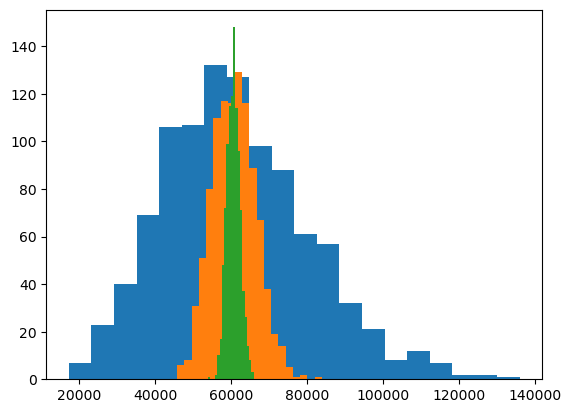

In [7]:
#Now run the code for sample sizes of n=5, n=50 and n=500 and compare the histograms

print('with n=5', income_sample_dist(dfIncome, 5, 1000))
      
print('with n=50', income_sample_dist(dfIncome, 50, 1000))
            
print('with n=500', income_sample_dist(dfIncome, 500, 1000))

Your commentary on the results


### [16 points] Problem 2 

You bring many donuts (or _doughnuts_, if you will) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

**Solution**

$z = \frac{200-190}{\frac{40}{\sqrt{36}}}$

$z = 1.5$

In [8]:
print('probablility is:', 1 - stats.norm.cdf(1.5))

probablility is: 0.06680720126885809


**Part B.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the minimum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.001?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

In [9]:
print('z = ', -1 * stats.norm.ppf(0.001))

z =  3.090232306167813


**Solution**

$3.09 = \frac{200-\mu_{\bar x}}{\frac{40}{\sqrt{36}}}$

$\mu_{\bar x} = 179.4$



**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.001. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

**Solution**


z is still 3.09

$3.09 = \frac{200 - 190}{\frac{40}{\sqrt n } }$


round 153 because we need whole number doughnuts (go on the safe side round up)...
$n = 153$


**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

**Solution**

Yes! What if we have a sneaky outliar doughnut which has a super high ammount of radiation! The vast majority of the time people will be fine eating them, but every once in a while someone will be dead af.

### [16 points] Problem 3


In this problem, we'll see how the Central Limit Theorem can also be used to calculate probabilities regarding proportions.  




Suppose we're interested in determining out of a random sample of $100$ American women, the probability that between $65$ and $70$ of those women sampled actually dye their hair (i.e. the probability that the proportion who dye is between $0.65$ and $0.70$).  Suppose, on average, $67.5\%$ of American women dye their hair.

Let 

$\begin{equation}
X_i=
    \begin{cases}
        0 & \text{if the $i^{th}$ woman sampled doesn't dye her hair}\\
        1 & \text{if the $i^{th}$ woman sampled dyes her hair}
    \end{cases}
\end{equation}$


In this case we define the sample proportion, $\hat{p}$ as follows:     
$$\hat{p} =\bar{X} = \frac{X_1+X_2+X_3+...X_{n}}{n} = \frac{\text{# women who dye their hair}}{\text{size of sample}}$$


Option 1:   
Let $Y = X_1+X_2+X_3+....X_{n}$ be the random variable that describes the number of women in a sample of size $n$ who dye their hair.  Then in this case, $Y\sim Bin(n=100, 0.675)$.  Thus, this question is equivalent to asking for $P(65 \leq Y \leq 70)$.  We can do this in Python as follows:


In [10]:
stats.binom.cdf(70, 100, 0.675)-stats.binom.cdf(65, 100, 0.675)

0.40547695343809625

**Option 2:** Instead, let's approach this same problem from the perspective of the Central Limit Theorem.   This will give us a close estimate to the actual probability we found in Option 1.



Notice $$P(65 \leq Y \leq 70) =P(\frac{65}{n} \leq \frac{Y}{n} \leq \frac{70}{n}) =   P(\frac{65}{100} \leq \bar{X}  \leq \frac{70}{100})$$ 




**Part A**   What probability are we trying to calculate in this problem?  Write your answer in terms of $\hat{p}$.  

**Solution**






**Part B** 

i).  What type of distribution does $X_i$ have?  





**Solution**

X has a normal distribution.

ii).  What is $E[X_i]$?


**Solution**


0.675 ???

iii).  What is $Var[X_i]$?

**Solution**




WHAT

**Part C**

i).  What type of distribution does $\hat{p}$ have?  Can we use the Central Limit Theorem in this case or not?   (Hint:  In class, we noted that the Central Limit Theorem only holds for binomial samples (and thus bernoulli samples, which are a special case of binomial) under specific conditions.  Are these conditions satisifed in this case?)


**Solution**

ii). What is $E[\hat{p}]$?

**Solution**

iii).  What is $Var[\hat{p}]$?

**Solution**

**Part D**  Putting this all together, what is $(0.65 <  \hat{p}< 0.7)$ using this approximation from the Central Limit theorem?  

**Solution**




### [8 points] Problem 4 

At birth, girl hippo weights are distributed as a Gaussian with mean 160kg, and standard deviation 4kg. At birth, boy hippo weights are distributed as a Gaussian with mean 165kg, and standard deviation of 5kg. 

You believe in general there's a 50/50 chance for a given baby hippo to be a boy or a girl.  

A baby hippo is born at the zoo and all you are told is that it is 163kg.

**Part A**    What is the probability that it is a girl?   Write your answer in LaTeX.  


**Solution** 

**Part B**  Explain what each of the terms below mean in the context of this particular example:

i).  Prior

ii).  Evidence

iii).  Posterior

iv).  Likelihood

**Solution** 

**Part C**    Is the posterior probability in this example greater than or less than the prior probability?

## Final Answers To Selected Problems

These are final answers for selected problems so you can check your work and determine if you are on the right track.  To receive credit on each problem you must show all steps leading to these answers, fully answer the problem, and justify your answer using correct mathematical notation.
***

2a).  $0.0668$

2b).  $179.4$

2c).  At least $153$


3bii).  $Var[X_i] = \frac{351}{1600}$

3d).  $\approx 0.4065$

4a). $0.45$